<a href="https://colab.research.google.com/github/Hussy24/AI-Labs/blob/main/Assignemnt_3(Hasnain_SmS_spam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df1 = pd.read_csv("/content/drive/MyDrive/spam.csv", encoding='latin-1') 

In [6]:
# Dropping the Null columns
df1.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
# Removing the duplicates from the dataset
df1.drop_duplicates(inplace=True)
df1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df1['v1'] = df1.v1.map({'ham':0, 'spam':1})
df1

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:

df1['v1'].unique()

array([0, 1])

In [10]:
# Performing NLTK functions to Optimize the dataset

import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_sms(message):
    
    # to convert all characters in lower case
    message=message.lower()
    
    # to break sms record into words
    message=nltk.word_tokenize(message)
    
    # to remove special symbals
    temp=[]
    for i in message:
        if i.isalnum():
            temp.append(i)

    # creating clone of temp
    message=temp[:]   
    
    # clear the temp object
    temp.clear()
    
    # removing stopwords and punctuations
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)
    
    message=temp[:]
    temp.clear()
    
    # stemming
    for i in message:
        temp.append(ps.stem(i))
    
    
    return " ".join(temp)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
# Applying nltk transformation function

df1['v2']= df1['v2'].apply(transform_sms)

# All stopwords and puctuation signs and extra space is removed

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
# converting into vectors
x = tfidf.fit_transform(df1['v2']).toarray()

In [13]:
y= df1['v1'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [14]:
# Splitting the dataset 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print("x_train: ",x_train)
print("x_test: ",x_test)
print("y_train: ",y_train)
print("y_test: ",y_test)

x_train:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
x_test:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_train:  [0 0 0 ... 0 0 1]
y_test:  [0 0 0 ... 1 0 0]


In [24]:
#Applying Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score

from sklearn.metrics import mean_squared_error, mean_absolute_error



model_mnb = MultinomialNB()

model_mnb.fit(x_train,y_train)
# Predicting values
y_pred_mnb = model_mnb.predict(x_test)
y_pred_mnb

# Accessing Accuracy and Precision of model
print("Accuracy score :- ",accuracy_score(y_test,y_pred_mnb))
print("Precision score :- ",precision_score(y_test,y_pred_mnb))

# Calculate RMSE
rmse_mnb = np.sqrt(mean_squared_error(y_test, y_pred_mnb))

# Calculate MSE
mse_mnb = mean_squared_error(y_test, y_pred_mnb)

# Calculate MAE
mae_mnb = mean_absolute_error(y_test, y_pred_mnb)

# Print the evaluation metrics
print("Root Mean Square Error (RMSE):", rmse_mnb)
print("Mean Squared Error (MSE):", mse_mnb)
print("Mean Absolute Error (MAE):", mae_mnb)

Accuracy score :-  0.9613152804642167
Precision score :-  0.9906542056074766
Root Mean Square Error (RMSE): 0.19668431441216497
Mean Squared Error (MSE): 0.03868471953578337
Mean Absolute Error (MAE): 0.03868471953578337


In [25]:
# Applyin Logistic Regression
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
# train the model
model_lr.fit(x_train,y_train)

y_pred_lr=model_lr.predict(x_test)
y_pred_lr

print("accuracy score :- ",accuracy_score(y_test,y_pred_lr))
print("precision score :- ",precision_score(y_test,y_pred_lr))

# Calculate RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Calculate MSE
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Calculate MAE
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Print the evaluation metrics
print("Root Mean Square Error (RMSE):", rmse_lr)
print("Mean Squared Error (MSE):", mse_lr)
print("Mean Absolute Error (MAE):", mae_lr)

accuracy score :-  0.9487427466150871
precision score :-  0.9423076923076923
Root Mean Square Error (RMSE): 0.2264006479339513
Mean Squared Error (MSE): 0.05125725338491296
Mean Absolute Error (MAE): 0.05125725338491296


In [26]:
# Applying Decison Tree

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

model_dt.fit(x_train, y_train)

y_pred_dt = model_dt.predict(x_test)
y_pred_dt

print("accuracy score :- ",accuracy_score(y_test,y_pred_dt))
print("precision score :- ",precision_score(y_test,y_pred_dt))

# Calculate RMSE
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Calculate MSE
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate MAE
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Print the evaluation metrics
print("Root Mean Square Error (RMSE):", rmse_dt)
print("Mean Squared Error (MSE):", mse_dt)
print("Mean Absolute Error (MAE):", mae_dt)

accuracy score :-  0.9458413926499033
precision score :-  0.8201438848920863
Root Mean Square Error (RMSE): 0.23272001922932353
Mean Squared Error (MSE): 0.05415860735009671
Mean Absolute Error (MAE): 0.05415860735009671


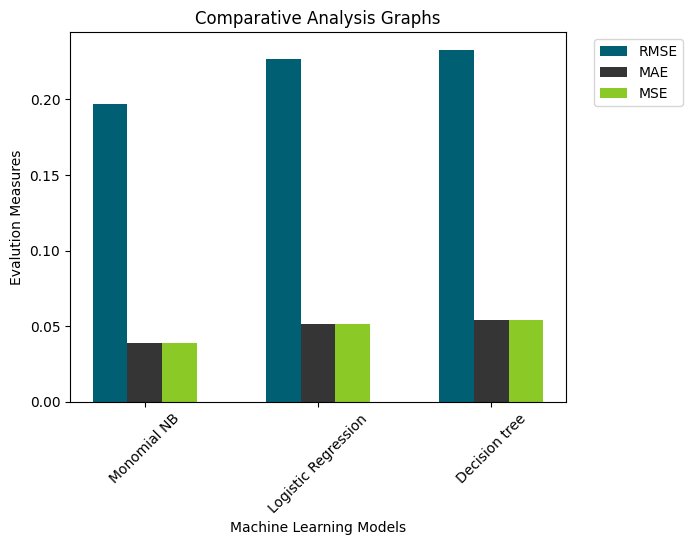

In [32]:
import matplotlib.pyplot as plt

# Define model names and error metrics
models = ["Monomial NB", "Logistic Regression","Decision tree"]
rmse = [rmse_mnb, rmse_lr, rmse_dt]
mae = [mae_mnb, mae_lr, mae_dt]
mse = [mse_mnb, mse_lr, mse_dt]

# Set the width of the bars
width = 0.2

# Set the positions of the bars
x1 = np.arange(len(models))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

# Plot the bars
plt.bar(x1, rmse, width=width, color="#005f73", label="RMSE")
plt.bar(x2, mae, width=width, color="#353535", label="MAE")
plt.bar(x3, mse, width=width, color="#8ac926", label="MSE")

# Add labels and title
plt.xlabel("Machine Learning Models")
plt.ylabel("Evalution Measures")
plt.title("Comparative Analysis Graphs")
plt.xticks(x2, models, rotation=45)

plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()